In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\Mall_Customers.csv')

In [3]:
# Prepare the features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Determine the optimal number of clusters using the Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method for Optimal k')

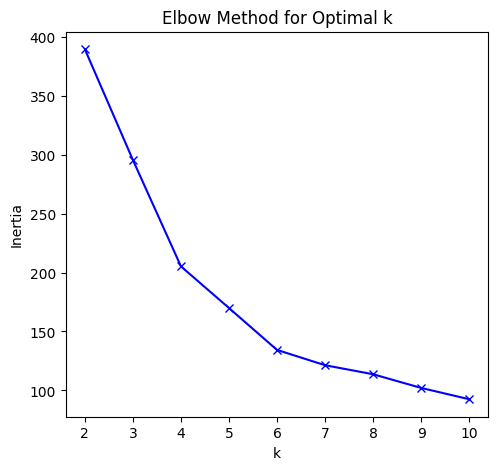

In [6]:
# Plot the Elbow Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

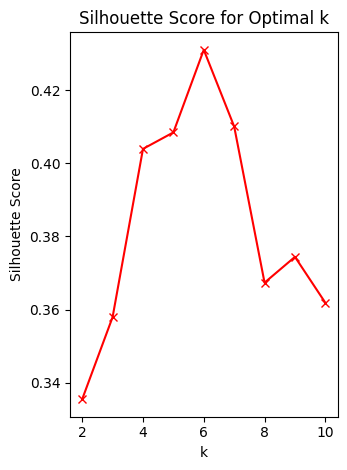

In [7]:
# Plot the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.tight_layout()
plt.show()

In [8]:
# Choose the optimal number of clusters (let's say it's 5 based on the plots)
optimal_k = 5

In [9]:
# Implement K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [10]:
# Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

In [11]:
# Analyze cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=features)
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
         Age  Annual Income (k$)  Spending Score (1-100)
0  55.275862           47.620690               41.706897
1  32.875000           86.100000               81.525000
2  25.769231           26.115385               74.846154
3  26.733333           54.311111               40.911111
4  44.387097           89.774194               18.483871


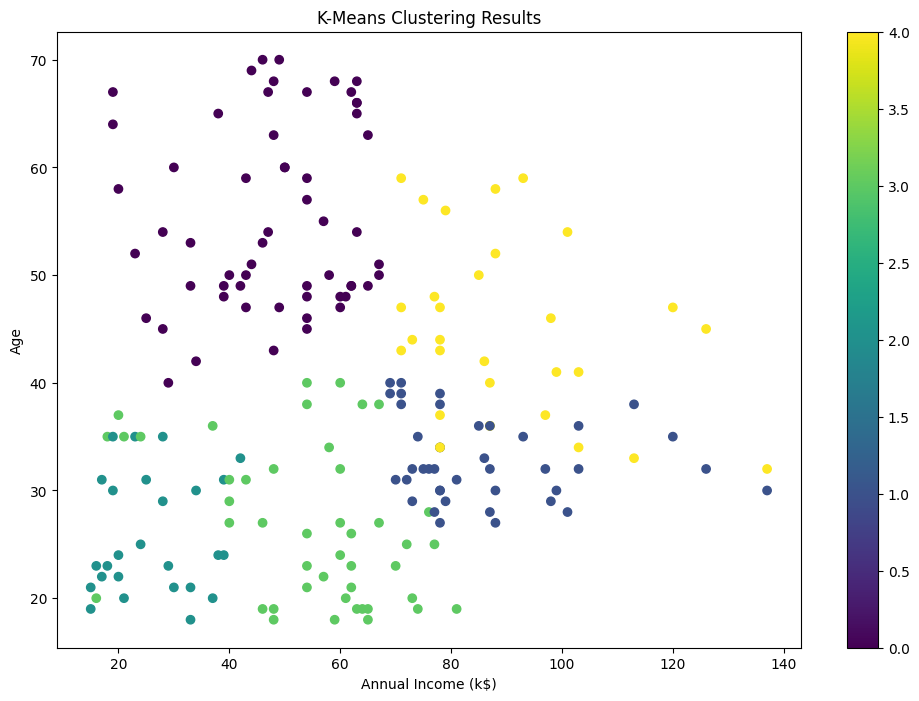

In [12]:
# Visualize the clusters (using Age and Annual Income)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Age'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.title('K-Means Clustering Results')
plt.colorbar(scatter)
plt.show()

In [13]:
# Analyze cluster characteristics
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} characteristics:")
    print(cluster_data[features].describe())


Cluster 0 characteristics:
             Age  Annual Income (k$)  Spending Score (1-100)
count  58.000000           58.000000               58.000000
mean   55.275862           47.620690               41.706897
std     8.571256           13.413567               15.697814
min    40.000000           19.000000                3.000000
25%    49.000000           39.250000               37.250000
50%    53.000000           48.500000               46.000000
75%    63.750000           59.750000               52.000000
max    70.000000           67.000000               60.000000

Cluster 1 characteristics:
             Age  Annual Income (k$)  Spending Score (1-100)
count  40.000000           40.000000               40.000000
mean   32.875000           86.100000               81.525000
std     3.857643           16.339036                9.999968
min    27.000000           69.000000               58.000000
25%    30.000000           74.750000               74.000000
50%    32.000000           78

In [14]:
# Calculate the distribution of data points across clusters
cluster_distribution = df['Cluster'].value_counts().sort_index()
print("\nDistribution of data points across clusters:")
print(cluster_distribution)


Distribution of data points across clusters:
Cluster
0    58
1    40
2    26
3    45
4    31
Name: count, dtype: int64


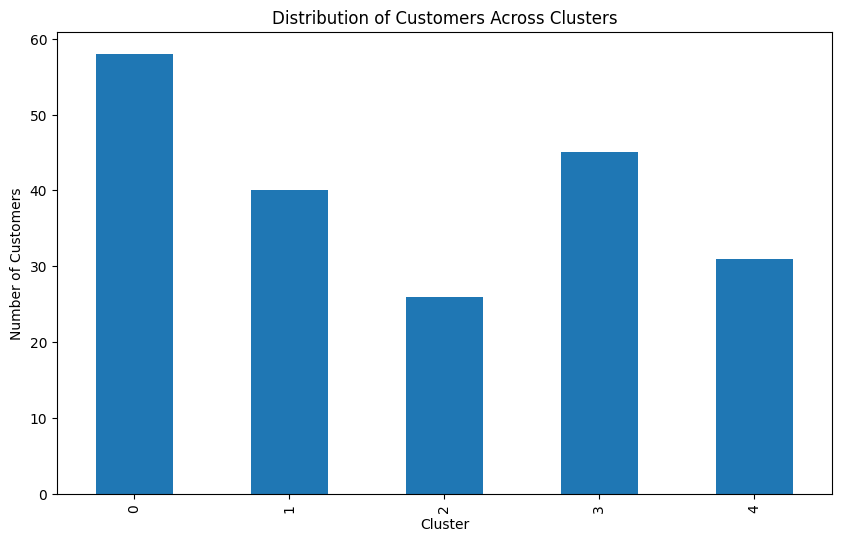

In [15]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
cluster_distribution.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Clusters')
plt.show()